In [84]:
import cv2
from plantcv import plantcv as pcv

In [74]:
class options:
    def __init__(self):
        self.image = "./img/6.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "ml_tutorial_results.json"
        self.outdir = "."

# Get options
args = options()

# Set debug to the global parameter
pcv.params.debug = args.debug

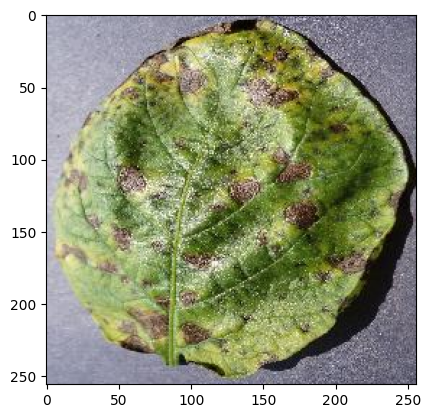

In [75]:
# Read image

# Inputs:
img, path, filename = pcv.readimage(filename=args.image)

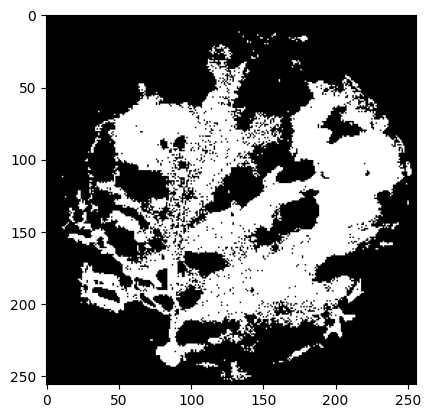

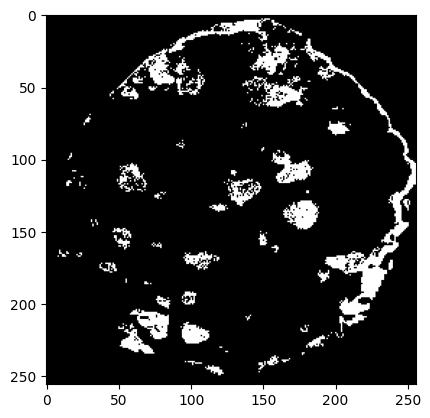

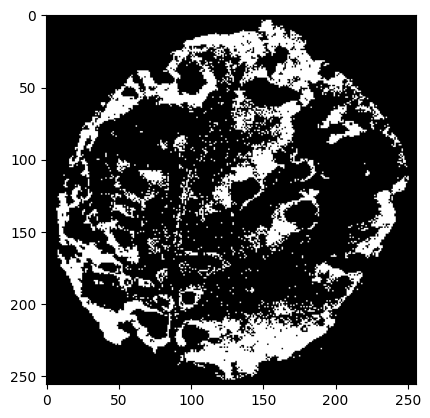

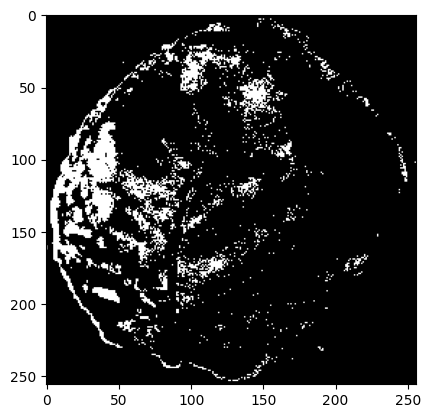

In [76]:
# Use the output file from `plantcv-train.py` to run the multiclass
# naive bayes classification on the image. The function below will
# print out 4 masks (plant, pustule, chlorosis, background)
mask = pcv.naive_bayes_classifier(rgb_img=img,
                                  pdf_file="./img/machine_learning.txt")

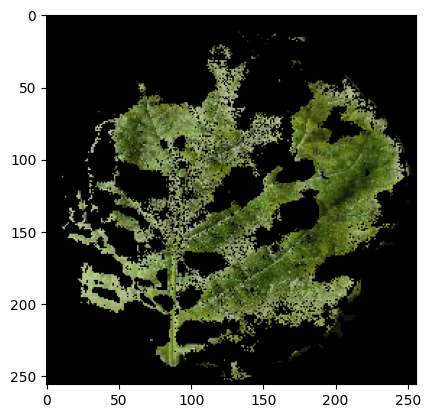

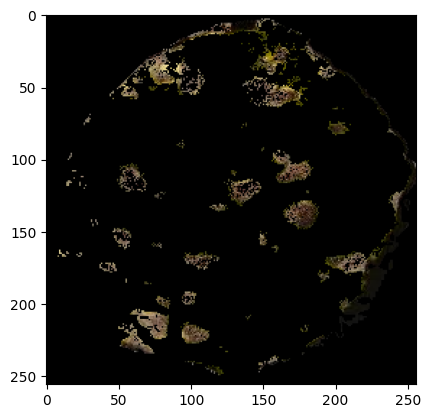

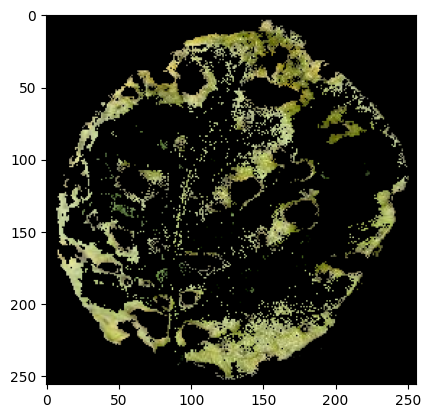

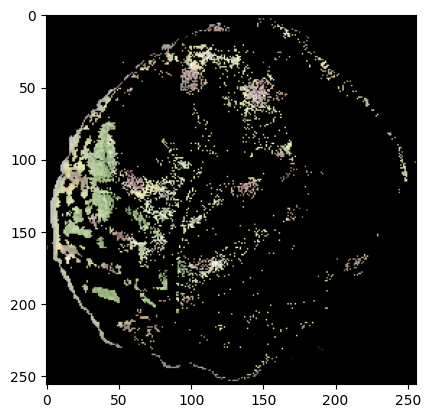

In [77]:
# We can apply each mask to the original image to more accurately
# see what got masked

plant_img = pcv.apply_mask(mask=(mask['plant']), img=img, mask_color='black')
pustule_img = pcv.apply_mask(mask=(mask['pustule']), img=img, mask_color='black')
chlorosis_img = pcv.apply_mask(mask=(mask['chlorosis']), img=img, mask_color='black')
background_img = pcv.apply_mask(mask=(mask['background']), img=img, mask_color='black')

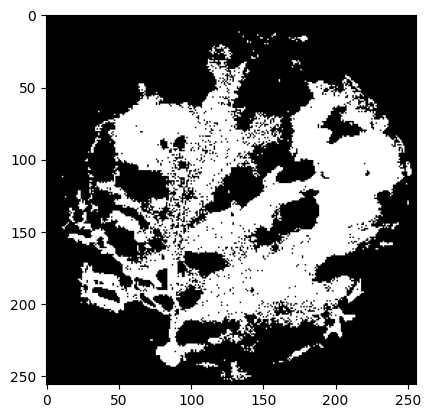

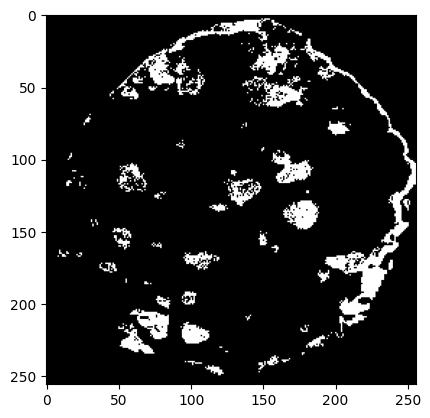

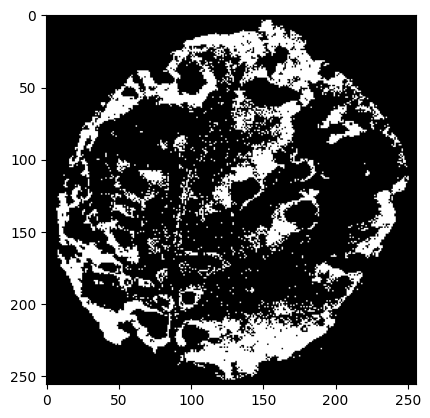

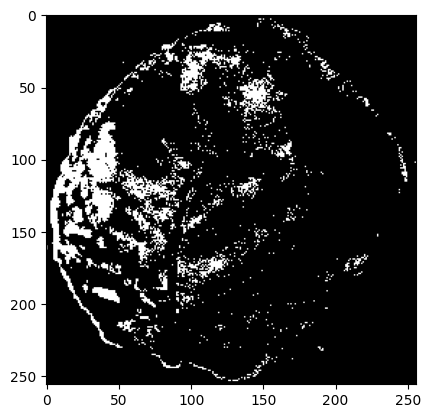

In [78]:
# Write image and mask with the same name to the path
# specified (creates two folders within the path if they do not exist).

plant_maskpath, plant_analysis_images = pcv.output_mask(img=img, mask=mask['plant'],
                                                        filename='plant.png', mask_only=True)
pust_maskpath, pust_analysis_images = pcv.output_mask(img=img, mask=mask['pustule'],
                                                      filename='pustule.png', mask_only=True)
chlor_maskpath, chlor_analysis_images = pcv.output_mask(img=img, mask=mask['chlorosis'],
                                                        filename='chlorosis.png', mask_only=True)
bkgrd_maskpath, bkgrd_analysis_images = pcv.output_mask(img=img, mask=mask['background'],
                                                        filename='background.png', mask_only=True)

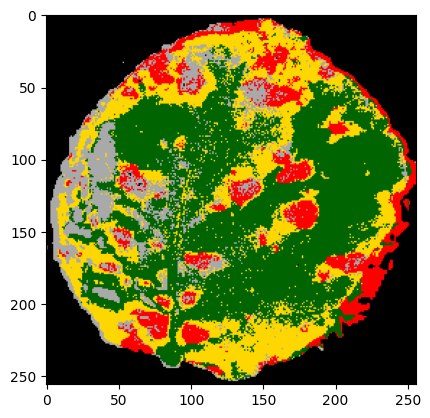

In [79]:
# To see all of these masks together we can plot them with plant set to green,
# chlorosis set to gold, and pustule set to red.

classified_img = pcv.visualize.colorize_masks(masks=[mask['plant'], mask['pustule'],
                                                     mask['chlorosis'], mask['background']],
                                              colors=['dark green', 'red', 'gold', 'gray'])

In [80]:
import numpy as np

# Calculate percent of the plant found to be diseased
sick_plant = np.count_nonzero(mask['pustule']) + np.count_nonzero(mask['chlorosis'])
healthy_plant = np.count_nonzero(mask['plant'])
percent_diseased = sick_plant / (sick_plant + healthy_plant)

In [81]:
# Create a new measurement (gets saved to the outputs class)
pcv.outputs.add_observation(sample='default', variable='percent_diseased', trait='percent of plant detected to be diseased',
                            method='ratio of pixels', scale='percent', datatype=float,
                            value=percent_diseased, label='percent')

In [82]:
# Data stored to the outputs class can be accessed using the variable name
pcv.outputs.observations['default']['percent_diseased']['value']

0.46695481730914207

In [83]:
# The save results function will take the measurements stored when running any PlantCV analysis functions, format,
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object,
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file
pcv.outputs.save_results(filename=args.result)Ы